<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment2_10_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


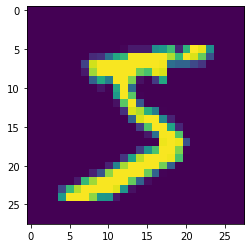

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#Use GAP, BN, LRscheduler, dropout, callbacks
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name="FirstConv"))#26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, kernel_size=(3, 3), activation='relu'))#24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(30, kernel_size=(3, 3), activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.01))

model.add(MaxPooling2D(2, 2))#11
model.add(Convolution2D(30, 1, activation='relu'))#11

model.add(Convolution2D(40, kernel_size=(3, 3), activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Convolution2D(60, kernel_size=(3, 3), activation='relu'))#5
#model.add(Dropout(0.01))

model.add(Convolution2D(10, 5))
model.add(BatchNormalization())

#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConv (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 30)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
snapshot_filepath = "/opt/saved_weight_file.hdf5"
cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
CALLBACKS = [cp_callback, lr_scheduler]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks = CALLBACKS)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 451us/step - loss: 0.3196 - acc: 0.9511 - val_loss: 0.0872 - val_acc: 0.9873

Epoch 00001: val_acc improved from -inf to 0.98730, saving model to /opt/saved_weight_file.hdf5
Epoch 2/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.1148 - acc: 0.9800 - val_loss: 0.0436 - val_acc: 0.9926

Epoch 00002: val_acc improved from 0.98730 to 0.99260, saving model to /opt/saved_weight_file.hdf5
Epoch 3/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0735 - acc: 0.9853 - val_loss: 0.0326 - val_acc: 0.9931

Epoch 00003: val_acc improved from 0.99260 to 0.99310, saving model to /opt/saved_weight_file.hdf5
Epoch 4/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0516 - acc: 0.9892 - val_loss: 0.0264 - val_acc: 0.9938

Epoch 00004: val_acc improved from 0.99310 to 0.99380, saving model to /opt/saved_weight_file.

In [0]:
model.load_weights(snapshot_filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01630240877982578, 0.9957]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.5025977e-06 5.2354557e-05 4.0386753e-06 2.5590192e-05 4.7952337e-05
  2.9980258e-05 1.8859435e-05 9.9969673e-01 9.6196010e-05 2.3831353e-05]
 [1.4978156e-07 3.3325680e-08 9.9999666e-01 2.8775366e-08 4.4209603e-08
  1.7332397e-07 4.3525509e-07 1.2068991e-06 7.8382681e-07 3.7610394e-07]
 [2.8240597e-06 9.9997628e-01 1.6260202e-06 3.0623905e-06 3.8023265e-06
  1.2036137e-06 2.0249161e-06 6.3277753e-06 1.6330350e-06 1.1696392e-06]
 [9.9998450e-01 1.6859285e-06 5.2615146e-08 6.8016179e-06 8.5064471e-07
  1.6742418e-06 1.1675916e-06 4.6486960e-07 9.0593494e-07 1.9985891e-06]
 [1.8013852e-04 5.0794559e-05 2.5559213e-05 4.2881543e-04 9.9900937e-01
  2.0476367e-05 1.2863248e-05 1.9757118e-04 4.5231249e-05 2.9238099e-05]
 [1.4944490e-06 9.9997675e-01 3.0977874e-06 2.2385714e-06 4.8418256e-06
  7.4678320e-07 2.0657903e-06 5.8206947e-06 9.3526745e-07 1.9840249e-06]
 [3.9121929e-07 1.6120186e-05 2.1964477e-06 6.5875874e-06 9.9995542e-01
  1.8299640e-07 2.6669261e-06 6.0987924e-07 1.1758773e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored